In [57]:
#!pip install Pillow
#!pip install opencv-python
#pip install rembg

In [1]:
# Necessary imports

from PIL import Image, ImageFilter,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from rembg import remove
import numpy as np


## Masking Manually

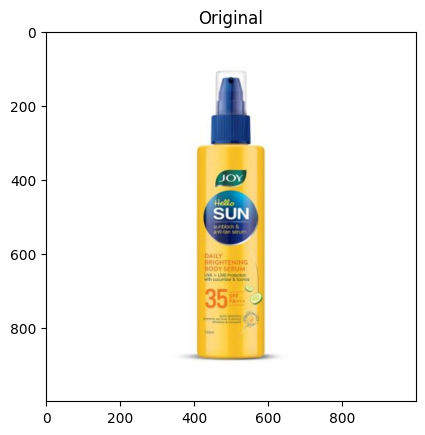

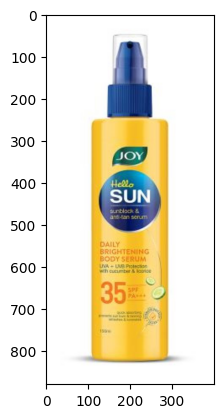

'#img_rembg = remove(input)\n\ngray = img.convert("L")  # Grayscale\n#gray.save("output_bgremoval\\product_sunscreen.jpeg")\nplt.title("GrayScale")\nplt.imshow(gray)\nplt.axis("off")\nplt.show()\n\nth = 100 # threshold\nimg_th = gray.point( lambda x: 255 if x > th else 0)\n\n# img_th.save("th.png")\nimg_th = img_th.convert("1")\nplt.title("GrayScale after thresholding")\nplt.imshow(img_th)\nplt.axis("off")\nplt.show()\n'

In [92]:

input_path =r"DEMO\Product_suscreen\Product_sunscreen03.jpg"

img = Image.open(input_path)
#img = img.resize((500,500))
plt.title("Original")
plt.imshow(img)
plt.axis()
plt.show()
img= img.crop((150*2,30*2,350*2,470*2))
plt.imshow(img)
plt.axis()
plt.show()
"""#img_rembg = remove(input)

gray = img.convert("L")  # Grayscale
#gray.save("output_bgremoval\product_sunscreen.jpeg")
plt.title("GrayScale")
plt.imshow(gray)
plt.axis("off")
plt.show()

th = 100 # threshold
img_th = gray.point( lambda x: 255 if x > th else 0)

# img_th.save("th.png")
img_th = img_th.convert("1")
plt.title("GrayScale after thresholding")
plt.imshow(img_th)
plt.axis("off")
plt.show()
"""


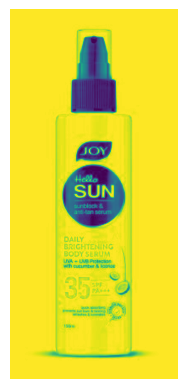

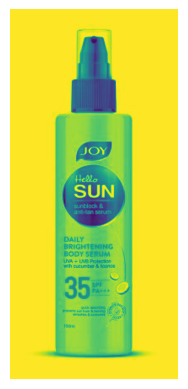

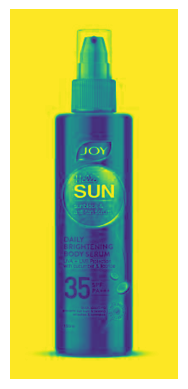

In [103]:
# function to split the colors in image


input_path =  r"DEMO\Product_suscreen\Product_sunscreen03.jpg"
# Open the original image 
image = Image.open(input_path).convert('RGB')
# Crop the image if needed
# resize 

image = image.crop((150*2,30*2,350*2,470*2))
red, green,blue = image.split()

plt.imshow(red)
plt.axis("off")
plt.show()
plt.imshow(green)
plt.axis("off")
plt.show()
plt.imshow(blue)
plt.axis("off")
plt.show()

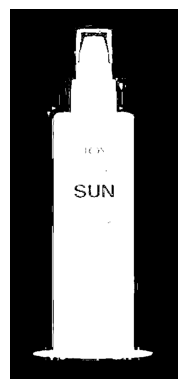

In [100]:
threshold = 250
img_th2 = blue.point(lambda x: 255 if x < threshold else 0)
img_th2= img_th2.convert("1")
plt.imshow(img_th2)
plt.axis("off")
plt.show()

In [60]:
def erode(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MinFilter(3))
  return image


def dilate(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MaxFilter(3))
  return image


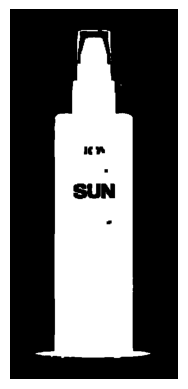

In [101]:
step_1 = erode(3, img_th2)
#step_1 = step_1.point(lambda x: 0 if x == 255 else 255)
plt.imshow(step_1)
plt.axis("off")
plt.show()

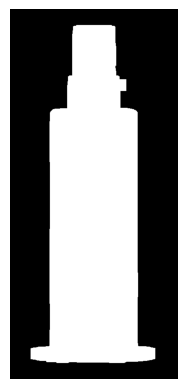

In [105]:
step_2 = dilate(12,step_1)
plt.imshow(step_2)
plt.axis("off")
plt.show()

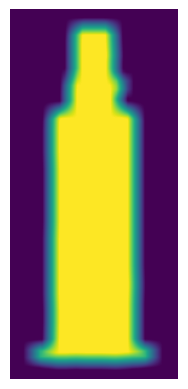

In [106]:
mask = erode(3, step_2)
mask = mask.convert("L")
mask = mask.filter(ImageFilter.BoxBlur(20))
plt.imshow(mask)
plt.axis("off")
plt.show()
#mask.save("output_bgremoval_mask\joy_log_mask.png")
#blank = image.point(lambda _: 0)
#segmented = Image.composite(image, blank,mask)
#segmented.save("output_bgremoval_mask\product_sunscreen_mask.png")
#plt.imshow(segmented)
#plt.axis("off")
#plt.show()

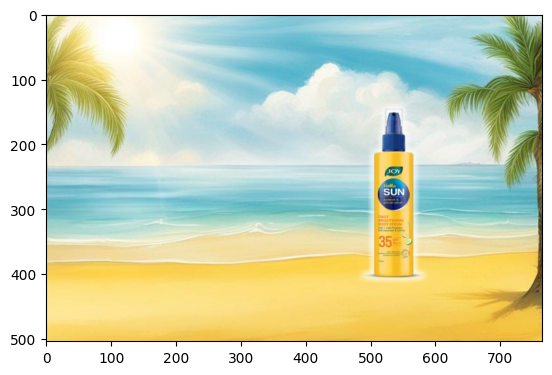

In [110]:
org_file= r"DEMO\generated\beach_bannerbg04.jpg"
with Image.open(org_file) as org:
     org.load()

resize_image = image.resize((image.width// 3, image.height // 3))
resize_mask = mask.resize((mask.width // 3, mask.height // 3))

org.paste(
    resize_image,
    (470, 130),
    resize_mask,)

plt.imshow(org)
plt.axis()
plt.show()

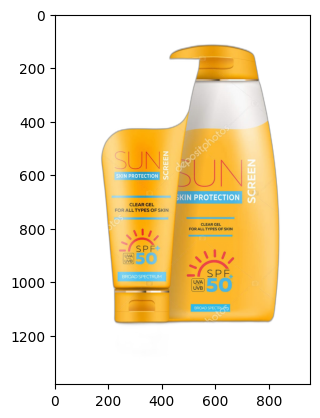

In [61]:
Img  = Image.open(r"DEMO\Product_suscreen\product_sunscreen.png")
new = remove(Img)

plt.imshow(new)

## Functions for the output